# Feature Selection in Covid-19 Dataset and Predictive Model to determine the Risk of Death

## 1. Data pre-processing  

### Importing the relevant libraries

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set() 

### Charging data

In [4]:
df=pd.read_csv('Data.csv',index_col=0) #Your data needs to have a .csv format

In [6]:
df.head(3) #Visualizing the data

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,RESULTADO,MORTALIDAD
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,,,,,,,
02/09/2020,194e4a,FUERA USMER,ESTATAL,27,Mujer,7,27,4,HOSPITALIZADO,29/06/2020,...,NO,NO,NO,SI,99,MÃ©xico,99,NO,POSITIVO COVID,1
02/09/2020,99786,FUERA USMER,IMSS,25,Hombre,25,25,6,AMBULATORIO,30/03/2020,...,NO,NO,NO,SI,99,MÃ©xico,99,NO APLICA,POSITIVO COVID,1
02/09/2020,097d14,FUERA USMER,ESTATAL,2,Hombre,2,2,2,AMBULATORIO,10/06/2020,...,NO,NO,NO,SI,99,MÃ©xico,99,NO APLICA,POSITIVO COVID,1


In [8]:
print('The dataset has %s observations and  %s regressors' % (df.shape[0],df.shape[1]))

The dataset has 1048575 observations and  35 regressors


### Checking data types

In [10]:
df.dtypes

ID_REGISTRO           object
ORIGEN                object
SECTOR                object
ENTIDAD_UM             int64
SEXO                  object
ENTIDAD_NAC            int64
ENTIDAD_RES            int64
MUNICIPIO_RES          int64
TIPO_PACIENTE         object
FECHA_INGRESO         object
FECHA_SINTOMAS        object
FECHA_DEF             object
INTUBADO              object
NEUMONIA              object
EDAD                   int64
NACIONALIDAD          object
EMBARAZO              object
HABLA_LENGUA_INDIG    object
DIABETES              object
EPOC                  object
ASMA                  object
INMUSUPR              object
HIPERTENSION          object
OTRA_COM              object
CARDIOVASCULAR        object
OBESIDAD              object
RENAL_CRONICA         object
TABAQUISMO            object
OTRO_CASO             object
MIGRANTE               int64
PAIS_NACIONALIDAD     object
PAIS_ORIGEN           object
UCI                   object
RESULTADO             object
MORTALIDAD    

In [11]:
#Generating a dataset copy to don't modify the original file
df_mapped=df.copy()

In [12]:
# Here, it is neccesary to drop the features that we don't need or what we consider not useful.  
df_mapped.drop(['ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES','MUNICIPIO_RES','PAIS_NACIONALIDAD','PAIS_ORIGEN','MIGRANTE','SECTOR','ORIGEN','ID_REGISTRO','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','NACIONALIDAD','HABLA_LENGUA_INDIG','INTUBADO','UCI'], axis='columns', inplace=True)

In [14]:
print('The new dataset has %s observations and  %s regressors' %(df_mapped.shape[0],df_mapped.shape[1]))

The new dataset has 1048575 observations and  18 regressors


### Checking missing values 


In [17]:
df_mapped.isnull().sum().sort_values(ascending=False).head(18)#counting the empty elements

SEXO              0
TIPO_PACIENTE     0
RESULTADO         0
OTRO_CASO         0
TABAQUISMO        0
RENAL_CRONICA     0
OBESIDAD          0
CARDIOVASCULAR    0
OTRA_COM          0
HIPERTENSION      0
INMUSUPR          0
ASMA              0
EPOC              0
DIABETES          0
EMBARAZO          0
EDAD              0
NEUMONIA          0
MORTALIDAD        0
dtype: int64

### Getting the dummies features 

In [19]:
df_w_dummy = pd.get_dummies(df_mapped, columns=['RESULTADO','SEXO','TIPO_PACIENTE','NEUMONIA','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO'],drop_first=True) #'drop first=True' indicates the elimination of the first variable for each categorie to avoid multicolinearity problems 


In [22]:
df_w_dummy.head() #Visualizing the data with dummies variables

,EDAD,MORTALIDAD,RESULTADO_POSITIVO COVID,RESULTADO_Resultado Pendiente,SEXO_Mujer,TIPO_PACIENTE_HOSPITALIZADO,NEUMONIA_NO ESPECIFICADO,NEUMONIA_SI,EMBARAZO_NO APLICA,EMBARAZO_SE IGNORA,...,CARDIOVASCULAR_SE IGNORA,CARDIOVASCULAR_SI,OBESIDAD_SE IGNORA,OBESIDAD_SI,RENAL_CRONICA_SE IGNORA,RENAL_CRONICA_SI,TABAQUISMO_SE IGNORA,TABAQUISMO_SI,OTRO_CASO_NO ESPECIFICADO,OTRO_CASO_SI
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,,,,,,,
02/09/2020,35,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
02/09/2020,35,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
02/09/2020,27,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
02/09/2020,38,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
02/09/2020,64,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
### Checking data types of the new dataset

In [24]:
df_w_dummy.dtypes

EDAD                             int64
MORTALIDAD                       int64
RESULTADO_POSITIVO COVID         uint8
RESULTADO_Resultado Pendiente    uint8
SEXO_Mujer                       uint8
TIPO_PACIENTE_HOSPITALIZADO      uint8
NEUMONIA_NO ESPECIFICADO         uint8
NEUMONIA_SI                      uint8
EMBARAZO_NO APLICA               uint8
EMBARAZO_SE IGNORA               uint8
EMBARAZO_SI                      uint8
DIABETES_SE IGNORA               uint8
DIABETES_SI                      uint8
EPOC_SE IGNORA                   uint8
EPOC_SI                          uint8
ASMA_SE IGNORA                   uint8
ASMA_SI                          uint8
INMUSUPR_SE IGNORA               uint8
INMUSUPR_SI                      uint8
HIPERTENSION_SE IGNORA           uint8
HIPERTENSION_SI                  uint8
OTRA_COM_SE IGNORA               uint8
OTRA_COM_SI                      uint8
CARDIOVASCULAR_SE IGNORA         uint8
CARDIOVASCULAR_SI                uint8
OBESIDAD_SE IGNORA       

# 2. Defining the target

In [25]:
### Here we define that the target is the feature called "Mortalidad"

In [27]:
df_w_dummy.MORTALIDAD.value_counts() #Checking the number of deaths
#1=survivor
#0=death

1    970039
0     78536
Name: MORTALIDAD, dtype: int64

In [28]:
df_muertos = df_w_dummy[df_w_dummy['MORTALIDAD'] == 0]
df_vivos = df_w_dummy[df_w_dummy['MORTALIDAD'] == 1]

# 3. Feature selection process

In [35]:
#Undersampling and shuffling the data in order to have the same proportion in both classes and generate a robust model

In [36]:
df_vivos_reduced = df_vivos.sample(df_muertos.shape[0],random_state=103)
df_reduced = pd.concat([df_vivos_reduced,df_muertos],axis=0)
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced = df_reduced.astype('float64')
df_reduced.head()

,EDAD,MORTALIDAD,RESULTADO_POSITIVO COVID,RESULTADO_Resultado Pendiente,SEXO_Mujer,TIPO_PACIENTE_HOSPITALIZADO,NEUMONIA_NO ESPECIFICADO,NEUMONIA_SI,EMBARAZO_NO APLICA,EMBARAZO_SE IGNORA,...,CARDIOVASCULAR_SE IGNORA,CARDIOVASCULAR_SI,OBESIDAD_SE IGNORA,OBESIDAD_SI,RENAL_CRONICA_SE IGNORA,RENAL_CRONICA_SI,TABAQUISMO_SE IGNORA,TABAQUISMO_SI,OTRO_CASO_NO ESPECIFICADO,OTRO_CASO_SI
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,,,,,,,
02/09/2020,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/09/2020,51.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02/09/2020,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/09/2020,65.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
02/09/2020,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Checking the shape of the dataset

In [38]:
df_reduced.shape

(157072, 33)

### Verifing the sapmles for each class

In [50]:
df_reduced.MORTALIDAD.value_counts()

0.0    78536
1.0    78536
Name: MORTALIDAD, dtype: int64

In [40]:
# Establishing the target and the regressors
y=df_reduced['MORTALIDAD']
x=df_reduced.drop('MORTALIDAD',axis=1)

In [41]:
print(y.shape)
print(x.shape)

(157072,)
(157072, 32)


### Splitting the dataset in training and test

In [42]:
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(x)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=103)

### Getting the best variables using the RFE

In [44]:
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(solver='saga', class_weight='balanced')
selector = RFE(estimator, 15, step=1)
selector = selector.fit(X_train, y_train.ravel())

print(selector.support_)
print(selector.ranking_)

C:\Users\TORIT\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[ True  True  True  True  True False  True False  True  True False  True
 False False False False False  True False False  True  True False False
 False False False  True False False  True  True]
[ 1  1  1  1  1 17  1  7  1  1 16  1 11 18  4 14 13  1 10  6  1  1  2 15
  3  8  5  1  9 12  1  1]


In [45]:
best_variables = selector.support_
df_no_covid = x
df_no_covid.loc[:, best_variables].head()

,EDAD,RESULTADO_POSITIVO COVID,RESULTADO_Resultado Pendiente,SEXO_Mujer,TIPO_PACIENTE_HOSPITALIZADO,NEUMONIA_SI,EMBARAZO_SE IGNORA,EMBARAZO_SI,DIABETES_SI,INMUSUPR_SI,OTRA_COM_SE IGNORA,OTRA_COM_SI,RENAL_CRONICA_SI,OTRO_CASO_NO ESPECIFICADO,OTRO_CASO_SI
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,
02/09/2020,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/09/2020,51.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02/09/2020,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/09/2020,65.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
02/09/2020,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
best_variables

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True])

In [57]:
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True False  True False  True  True False  True
 False False False False False  True False False  True  True False False
 False False False  True False False  True  True]
[ 1  1  1  1  1 17  1  7  1  1 16  1 11 18  4 14 13  1 10  6  1  1  2 15
  3  8  5  1  9 12  1  1]


# 4. Generating the Logistic regression model and evaluating it

C:\Users\TORIT\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\TORIT\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


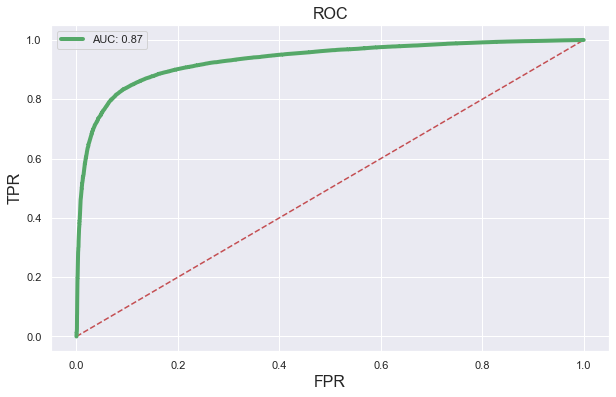

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
# Ejercicio

# En esta parte está diciendo que de los datos tome 2 variables para x que van a predecir a y
X = x[['EDAD','OTRO_CASO_NO ESPECIFICADO','RESULTADO_POSITIVO COVID', 'DIABETES_SI', 'NEUMONIA_SI','OTRO_CASO_SI','RESULTADO_POSITIVO COVID','CARDIOVASCULAR_SI','HIPERTENSION_SI','INMUSUPR_SI','OTRA_COM_SI','RESULTADO_Resultado Pendiente','TABAQUISMO_SI','ASMA_SI','OBESIDAD_SI']]
y = y

# Hacemos un split de los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# Se hace el ajuste y se calculan las variables de salida para entrenamiento y para prueba
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

# Se genera la figura en blanco de 0 a 1
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

# Se genera la grafica ROC y sus probabilidades así como los datos de la grafica
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)
label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();
plt.savefig('ROC.pdf')

### Making a classification report

In [49]:
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_test_hat, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87     23667
     Class 1       0.87      0.86      0.87     23455

    accuracy                           0.87     47122
   macro avg       0.87      0.87      0.87     47122
weighted avg       0.87      0.87      0.87     47122



### Generating a confusion matrix

C:\Users\TORIT\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


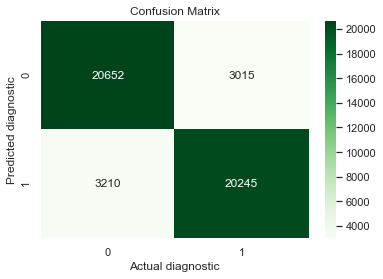

In [53]:
labels = [0,1]
confusion_matrix(y_test, y_test_hat,labels = labels)

cm = confusion_matrix(y_test, y_test_hat,labels)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greens')
plt.ylabel('Predicted diagnostic')
plt.xlabel('Actual diagnostic');
plt.title('Confusion Matrix')
plt.savefig('Confusion matrix.pdf')
